<a href="https://colab.research.google.com/github/omkar1kadam/2ndHandCarPriceprediction/blob/main/Car_prize_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import Normalization,Dense,InputLayer
from tensorflow.keras.losses import MeanSquaredError,Huber ,MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError,MeanAbsolutePercentageError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

2025-04-20 09:28:46.452213: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-20 09:28:46.456311: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-20 09:28:46.465832: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745141326.480961   23292 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745141326.485633   23292 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1745141326.498934   23292 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [3]:
data = pd.read_csv("train.csv", sep=",")
# data.head()
data.shape

(1000, 12)

In [4]:
# sns.pairplot(data[['v.id', 'on road old', 'on road now', 'years', 'km', 'rating',
#                    'condition', 'economy', 'top speed', 'hp', 'torque', 'current price']],diag_kind="kde")


In [5]:
tensor_data = tf.constant(data)
tensor_data = tf.random.shuffle(tensor_data)
print(tensor_data)

tf.Tensor(
[[1.830000e+02 5.708740e+05 7.532590e+05 ... 9.400000e+01 1.100000e+02
  2.534765e+05]
 [7.800000e+01 5.746910e+05 7.515130e+05 ... 6.100000e+01 1.200000e+02
  2.065910e+05]
 [1.340000e+02 6.602600e+05 7.917260e+05 ... 7.400000e+01 8.900000e+01
  4.259600e+05]
 ...
 [6.610000e+02 5.079830e+05 7.618110e+05 ... 9.000000e+01 1.240000e+02
  1.688545e+05]
 [5.040000e+02 5.411200e+05 7.785000e+05 ... 5.400000e+01 1.010000e+02
  4.151030e+05]
 [8.120000e+02 6.201030e+05 7.906840e+05 ... 6.400000e+01 1.240000e+02
  3.223680e+05]], shape=(1000, 12), dtype=float64)


2025-04-20 09:28:50.057931: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [6]:
X = tensor_data[:,3:-1]
y = tensor_data[:,-1]
y = tf.expand_dims(y,axis = -1)
print(X.shape)
print(y.shape)

(1000, 8)
(1000, 1)


In [7]:
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1

DATASET_SIZE = len(X)

# Split the data
X_train = X[:int(DATASET_SIZE * TRAIN_RATIO)]
y_train = y[:int(DATASET_SIZE * TRAIN_RATIO)]

X_val = X[int(DATASET_SIZE * TRAIN_RATIO):int(DATASET_SIZE * (TRAIN_RATIO + VAL_RATIO))]
y_val = y[int(DATASET_SIZE * TRAIN_RATIO):int(DATASET_SIZE * (TRAIN_RATIO + VAL_RATIO))]

X_test = X[int(DATASET_SIZE * (TRAIN_RATIO + VAL_RATIO)):]
y_test = y[int(DATASET_SIZE * (TRAIN_RATIO + VAL_RATIO)):]

# Check the shapes to confirm everything is correct
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (800, 8)
y_train shape: (800, 1)
X_val shape: (100, 8)
y_val shape: (100, 1)
X_test shape: (100, 8)
y_test shape: (100, 1)


In [8]:
import tensorflow as tf

# Normalizer - Adapted to the training data
normalizer = tf.keras.layers.Normalization()
normalizer.adapt(X_train)

# Model Setup
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(8,)),    # Step 1: Define input shape
    normalizer,                                      # Step 2: Apply pre-adapted normalizer
    tf.keras.layers.Dense(128, activation="relu"),   # Step 3: Add Dense layers
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(1),                        # Output layer (regression task)
])

# Display the model summary
model.summary()


/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 8)              │            17 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,322 (134.07 KB)

 Trainable params: 34,305 (134.00 KB)

 Non-trainable params: 17 (72.00 B)

In [9]:
tf.keras.utils.plot_model(model, to_file="model.png", show_shapes=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [10]:
model.compile(
    optimizer = Adam(learning_rate=0.1),  # safer value
    loss = MeanAbsoluteError(),
    metrics = [RootMeanSquaredError()]
)

In [11]:

import tensorflow as tf

# assuming X_train, y_train, X_val, y_val are numpy arrays
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=8, reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)

val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
val_dataset = val_dataset.batch(32).prefetch(tf.data.AUTOTUNE)


In [12]:
history = model.fit(train_dataset, validation_data = val_dataset,epochs = 100,verbose = 1)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 229754.1719 - root_mean_squared_error: 266056.2188 - val_loss: 73811.7422 - val_root_mean_squared_error: 90137.6797
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 60257.7383 - root_mean_squared_error: 74959.4922 - val_loss: 52009.7344 - val_root_mean_squared_error: 65062.6992
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 45966.1758 - root_mean_squared_error: 57495.4609 - val_loss: 52698.3047 - val_root_mean_squared_error: 66556.4141
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 48482.8164 - root_mean_squared_error: 59408.3281 - val_loss: 51524.9062 - val_root_mean_squared_error: 67008.4375
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 46773.4219 - root_mean_squared_error: 57551.0352 - val_loss: 49631.1016 - val_root_mean_squared_error: 63241.2109
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 44696.5430 - root_mean_squared_error: 54338.9414 - val_loss: 41358.1094 - 

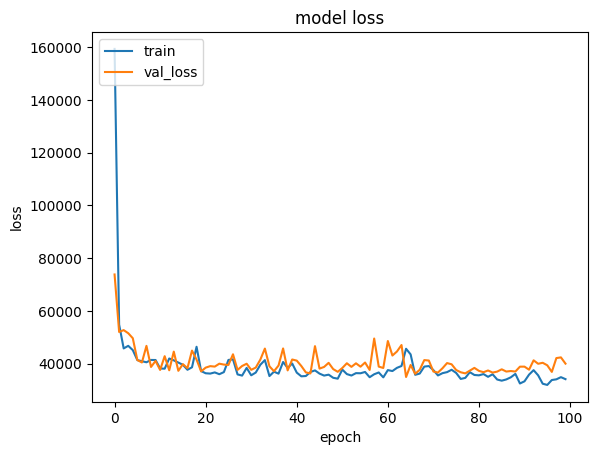

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val_loss'], loc='upper left')
plt.show()

In [14]:
model.evaluate(X_test,y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 35615.2852 - root_mean_squared_error: 44376.3125  


[37623.88671875, 47323.66796875]

In [15]:
X_test.shape

TensorShape([100, 8])

In [16]:
model.predict(tf.expand_dims(X_test[0],axis = 0))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


array([[478859.53]], dtype=float32)

In [17]:
y_test[0]

<tf.Tensor: shape=(1,), dtype=float64, numpy=array([459914.5])>

In [18]:
y_true = list(y_test[:,0].numpy())

In [19]:
y_pred = list(model.predict(X_test)[:,0])
print(y_pred[0])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
478859.6


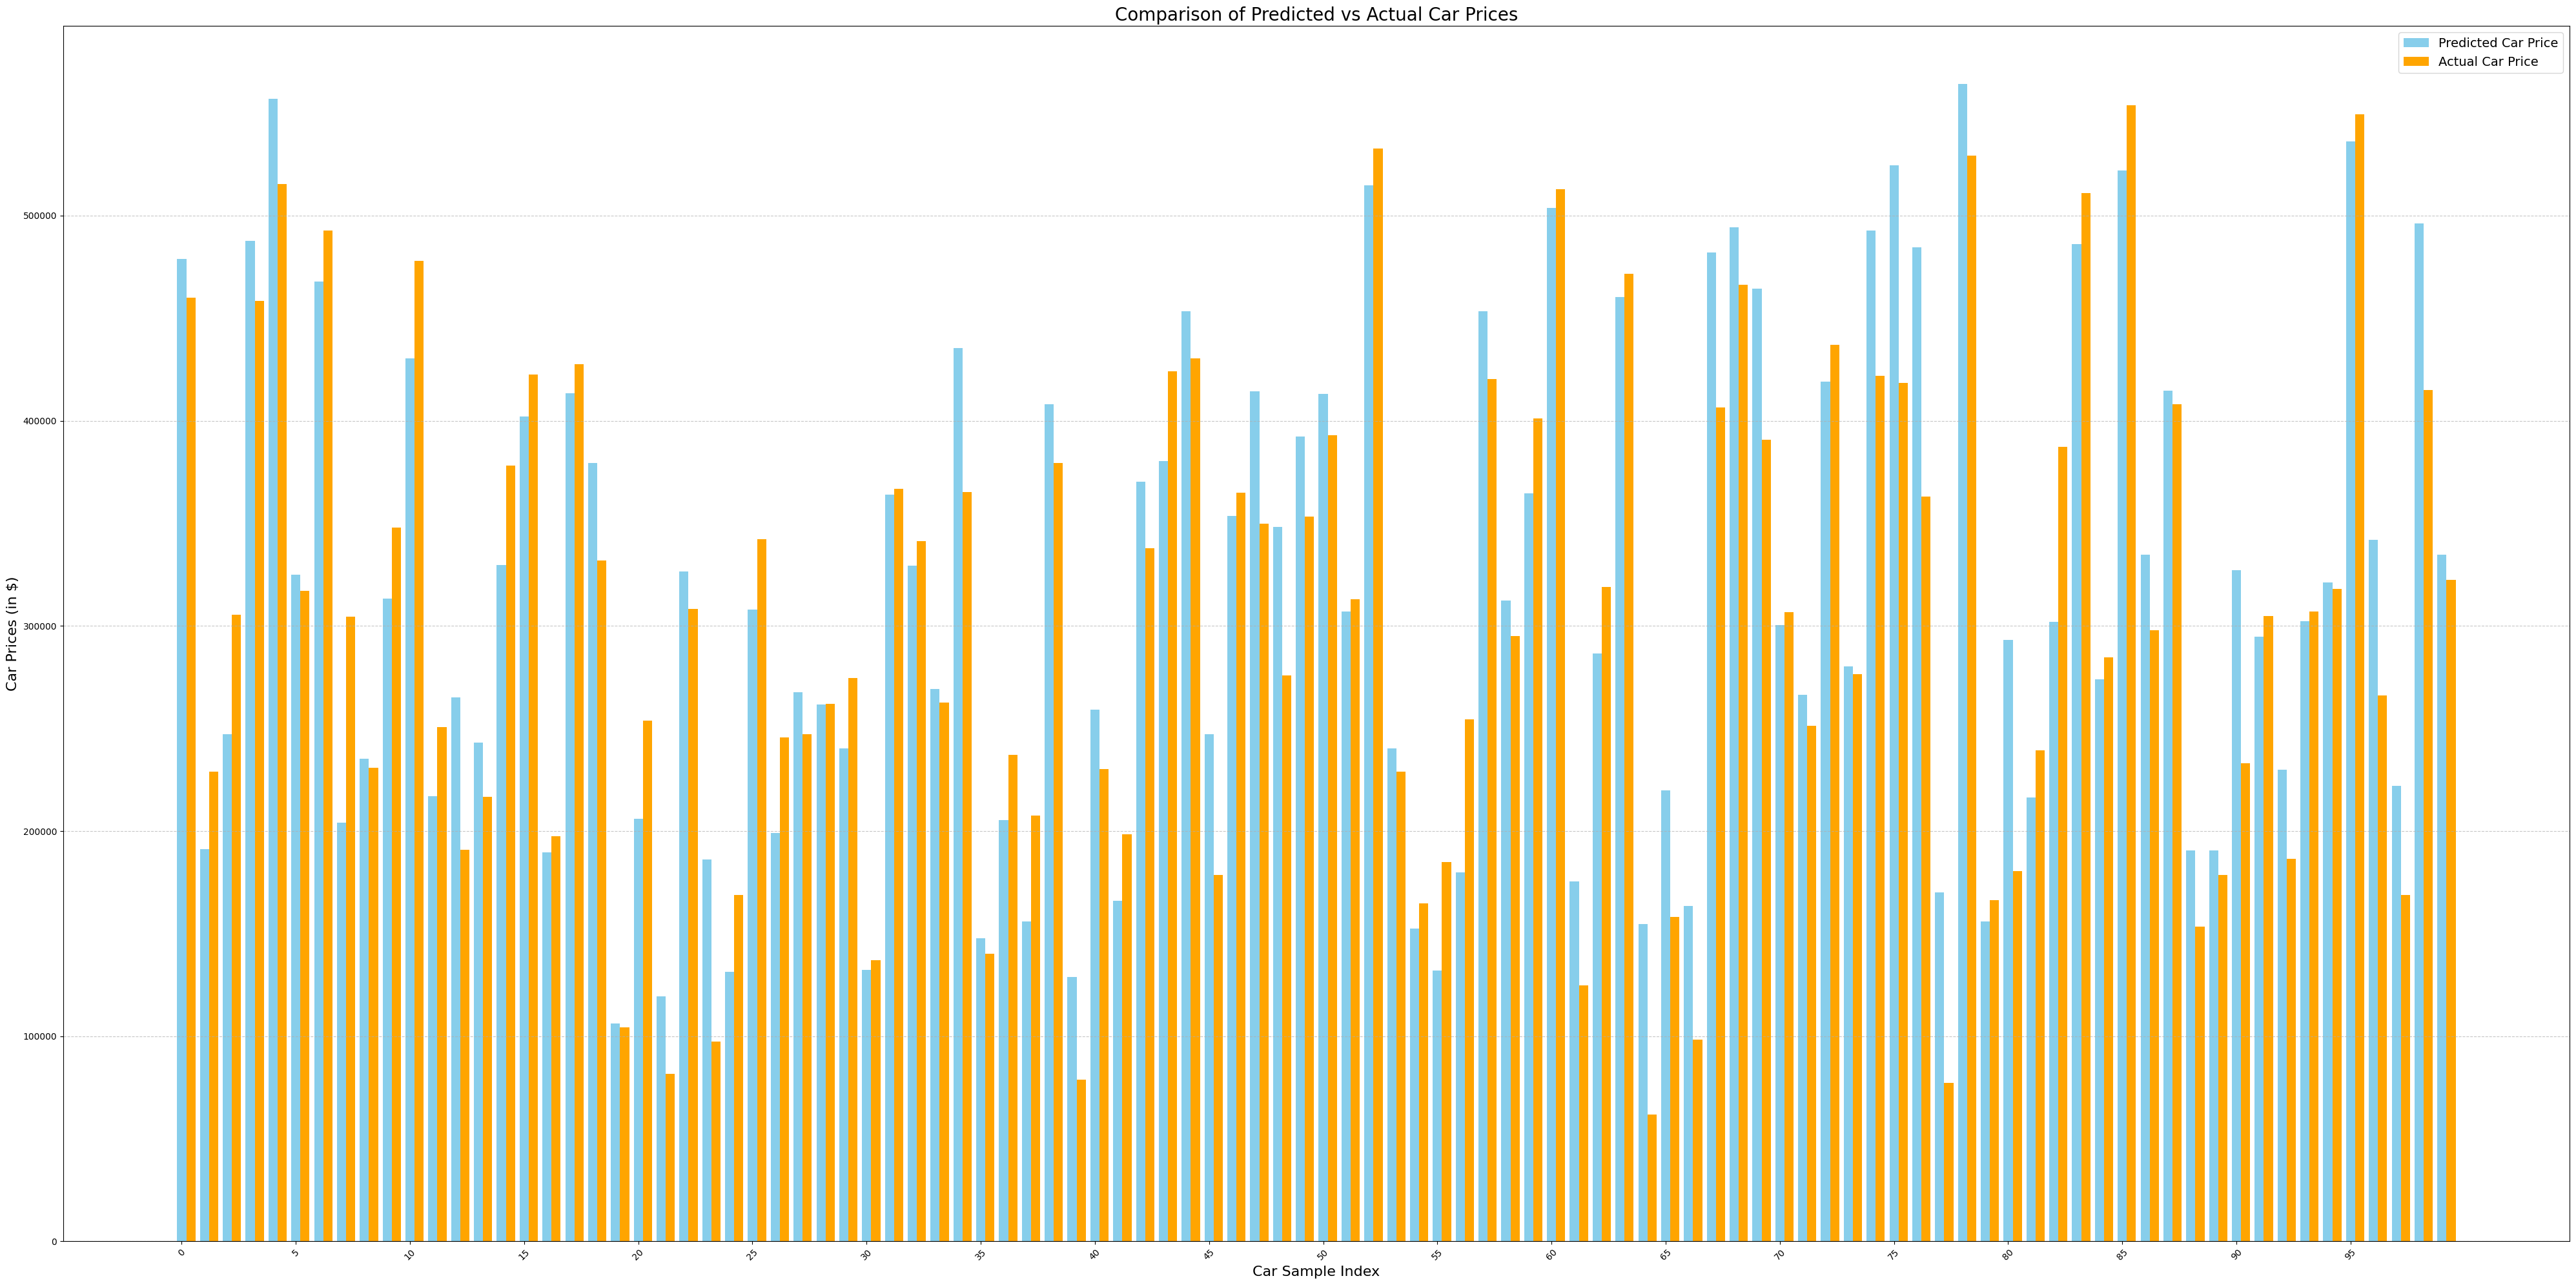

In [20]:
import numpy as np
import matplotlib.pyplot as plt
ind = np.arange(100)
plt.figure(figsize=(40, 20))
width = 0.4
plt.bar(ind, y_pred, width, label='Predicted Car Price', color='skyblue')
plt.bar(ind + width, y_true, width, label='Actual Car Price', color='orange')
plt.xlabel('Car Sample Index', fontsize=16)
plt.ylabel('Car Prices (in $)', fontsize=16)
plt.title('Comparison of Predicted vs Actual Car Prices', fontsize=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='upper right', fontsize=14)
plt.xticks(ind[::5], rotation=45, fontsize=10)
plt.tight_layout()
plt.show()


In [27]:
testin = 79

In [28]:
y_test[testin]

<tf.Tensor: shape=(1,), dtype=float64, numpy=array([166283.])>

In [29]:
y_pred = list(model.predict(X_test)[:,0])
print(y_pred[testin])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
156045.08
